In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=083b633c248158602076499e3d8d7201


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | tautira
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | crampoaia
City not found. Skipping...
Processing Record 11 of Set 1 | broken hill
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | hambantota
Processing Record 14 of Set 1 | bondo
Processing Record 15 of Set 1 | uyuni
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | coahuayana
Processing Record 20 of Set 1 | kenai
Processing Record 

Processing Record 35 of Set 4 | havre-saint-pierre
Processing Record 36 of Set 4 | husavik
Processing Record 37 of Set 4 | weiser
Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | elizabeth city
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | obo
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | duz
City not found. Skipping...
Processing Record 46 of Set 4 | eirunepe
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | santa lucia
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | ust-kulom
Processing Record 4 of Set 5 | beyneu
Processing Record 5 of Set 5 | morros
Processing Record 6 of Set 5 | okhotsk
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of

Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | kamloops
Processing Record 30 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 8 | ucluelet
Processing Record 32 of Set 8 | kamaishi
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | henties bay
Processing Record 36 of Set 8 | general pico
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | teya
Processing Record 39 of Set 8 | mossendjo
Processing Record 40 of Set 8 | lapeer
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | ahuimanu
Processing Record 43 of Set 8 | camana
Processing Record 44 of Set 8 | barbar
City not found. Skipping...
Processing Record 45 of Set 8 | hargeysa
Processing Record 46 of Set 8 | olovyannaya
Processing Record 47 of Set 8 | sabanalarga
Processing Record 48 of Set 8 | gabu
Processing Record 49 of Set 8 | xinzhi
Processing Record 50 of Set 8 | bilibino
Proce

Processing Record 16 of Set 12 | saint-pierre
Processing Record 17 of Set 12 | bay city
Processing Record 18 of Set 12 | sarangani
Processing Record 19 of Set 12 | petit goave
Processing Record 20 of Set 12 | shimizu
Processing Record 21 of Set 12 | hihifo
City not found. Skipping...
Processing Record 22 of Set 12 | caconda
Processing Record 23 of Set 12 | clearlake
Processing Record 24 of Set 12 | rassvet
Processing Record 25 of Set 12 | juneau
Processing Record 26 of Set 12 | uspenskaya
Processing Record 27 of Set 12 | port hardy
Processing Record 28 of Set 12 | tytuvenai
Processing Record 29 of Set 12 | boda
Processing Record 30 of Set 12 | xingyi
Processing Record 31 of Set 12 | ternate
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | vardo
Processing Record 34 of Set 12 | falam
Processing Record 35 of Set 12 | kattivakkam
Processing Record 36 of Set 12 | antofagasta
Processing Record 37 of Set 12 | wladyslawowo
Processing Record 38 of Set 12 | horni plana

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,51.66,71,75,2.30,AU,2022-04-05 21:50:57
1,Vaini,-21.2000,-175.2000,82.56,74,40,3.44,TO,2022-04-05 21:50:57
2,Hilo,19.7297,-155.0900,78.53,76,100,4.00,US,2022-04-05 21:50:58
3,Ushuaia,-54.8000,-68.3000,38.86,75,75,29.93,AR,2022-04-05 21:50:54
4,Tautira,-17.7333,-149.1500,82.00,79,43,22.95,PF,2022-04-05 21:50:58
5,Rikitea,-23.1203,-134.9692,78.62,68,43,18.43,PF,2022-04-05 21:50:59
6,Carnarvon,-24.8667,113.6333,71.67,73,0,9.22,AU,2022-04-05 21:50:59
7,Broken Hill,-31.9500,141.4333,64.11,48,100,16.11,AU,2022-04-05 21:50:59
8,Hambantota,6.1241,81.1185,73.74,100,20,1.14,LK,2022-04-05 21:51:00
9,Bondo,3.8146,23.6866,70.32,96,100,0.69,CD,2022-04-05 21:51:00


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-04-05 21:50:57,-42.8794,147.3294,51.66,71,75,2.30
1,Vaini,TO,2022-04-05 21:50:57,-21.2000,-175.2000,82.56,74,40,3.44
2,Hilo,US,2022-04-05 21:50:58,19.7297,-155.0900,78.53,76,100,4.00
3,Ushuaia,AR,2022-04-05 21:50:54,-54.8000,-68.3000,38.86,75,75,29.93
4,Tautira,PF,2022-04-05 21:50:58,-17.7333,-149.1500,82.00,79,43,22.95
...,...,...,...,...,...,...,...,...,...
564,Mukhen,RU,2022-04-05 22:05:53,48.1000,136.1000,28.47,73,69,15.03
565,Salamanca,ES,2022-04-05 22:05:53,40.8333,-6.0000,41.00,81,95,2.91
566,Jizan,SA,2022-04-05 22:05:54,17.3333,42.6667,81.09,36,0,1.74
567,Arman,RU,2022-04-05 22:05:54,59.7000,150.1667,13.06,77,99,12.15


In [14]:
city_data_df.count()

City          569
Country       569
Date          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
dtype: int64

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

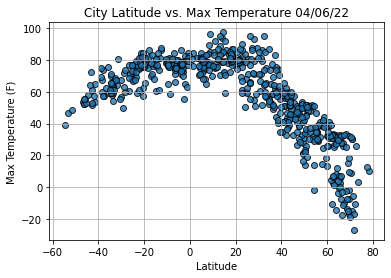

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

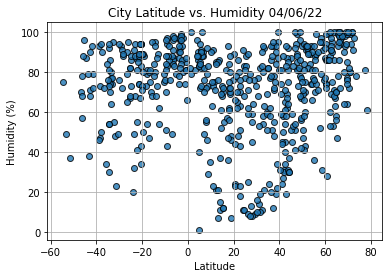

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

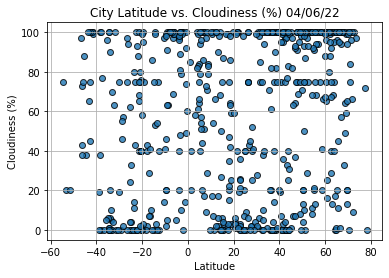

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

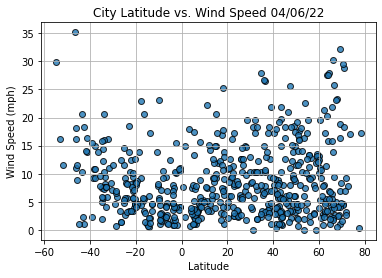

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()